# Jumia Laptops: Exploratory Data Analysis

In this notebook, we will analyze the cleaned dataset of laptops scraped from Jumia Kenya. The goal is to understand the market dynamics, such as pricing, brand popularity, and customer satisfaction.

### 1. Setup and Data Loading

First, we import the necessary libraries and load our cleaned dataset.

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['figure.dpi'] = 100

# Load the cleaned data
df = pd.read_csv('../data/processed/cleaned_jumia_laptops.csv')

### 2. Initial Data Inspection

In [39]:
print("Data Shape:", df.shape)
df.head()

Data Shape: (861, 8)


,product_name,brand,price,old_price,discount_percent,rating_score,rating_count,product_url
0,NaN,UNKNOWN,26499,47320,44.0,0.0,0,https://www.jumia.co.ke/hp-refurbished-elitebo...
1,NaN,UNKNOWN,17688,0,0.0,0.0,0,https://www.jumia.co.ke/apple-refurbished-13.3...
2,NaN,UNKNOWN,44220,0,0.0,0.0,0,https://www.jumia.co.ke/apple-refurbished-13.3...
3,NaN,UNKNOWN,14990,26768,44.0,0.0,0,https://www.jumia.co.ke/refurbished-thinkpad-x...
4,NaN,UNKNOWN,9199,13938,34.0,0.0,0,https://www.jumia.co.ke/hp-deskjet-ink-advanta...


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 861 entries, 0 to 860
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   product_name      809 non-null    object 
 1   brand             861 non-null    object 
 2   price             861 non-null    int64  
 3   old_price         861 non-null    int64  
 4   discount_percent  861 non-null    float64
 5   rating_score      861 non-null    float64
 6   rating_count      861 non-null    int64  
 7   product_url       861 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 53.9+ KB


### 3. Descriptive Statistics
Let's get a summary of the numerical columns to understand the distribution of prices, discounts, and ratings.

In [41]:
df[['price', 'old_price', 'discount_percent', 'rating_score', 'rating_count']].describe().round(2)

,price,old_price,discount_percent,rating_score,rating_count
count,861.00,861.00,861.00,861.00,861.00
mean,15099.22,20817.47,33.28,2.79,12.26
std,25724.53,32781.19,16.72,2.00,60.46
min,159.00,0.00,0.00,0.00,0.00
25%,997.00,1500.00,22.00,0.00,0.00
50%,5499.00,7000.00,36.00,3.80,2.00
75%,21500.00,30000.00,47.30,4.40,7.00
max,285000.00,400000.00,94.10,5.00,1364.00


**Initial Observations:**
**Price:** The average price is significant, but there's a huge range, from very low to very high. The high standard deviation indicates a wide spread of prices, which is typical for electronics.
- **Discount:** The average discount is around 20-30%, with some products having discounts as high as 50%.
- **Ratings:** The average rating score is skewed by the many products with 0 ratings. The `rating_count` shows that a large number of products have few or no reviews, which is common on e-commerce sites.

### 4. Price Distribution
Let's visualize the distribution of laptop prices. Since there are some very expensive outliers, we'll focus on products under KSh 100,000 for a clearer view.

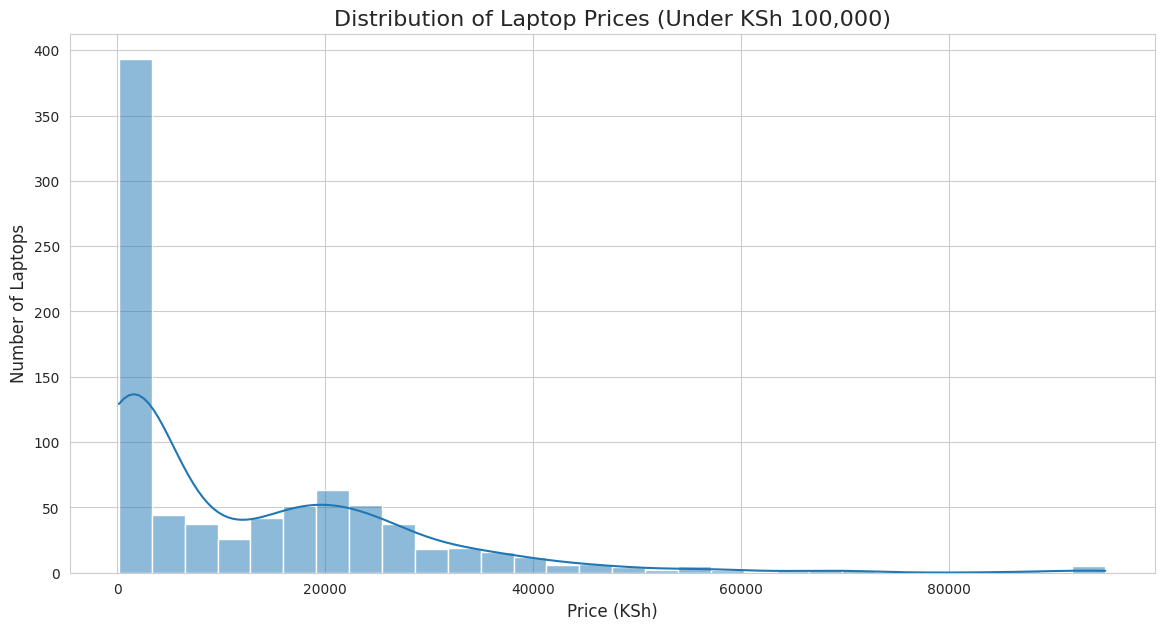

In [42]:
plt.figure(figsize=(14, 7))
sns.histplot(df[df['price'] < 100000]['price'], bins=30, kde=True)
plt.title('Distribution of Laptop Prices (Under KSh 100,000)', fontsize=16)
plt.xlabel('Price (KSh)', fontsize=12)
plt.ylabel('Number of Laptops', fontsize=12)
plt.show();

The histogram shows that the majority of laptops are priced between KSh 10,000 and KSh 40,000, which likely corresponds to refurbished or entry-level models.

### 5. Brand Analysis
Which brands are most frequently listed on Jumia?

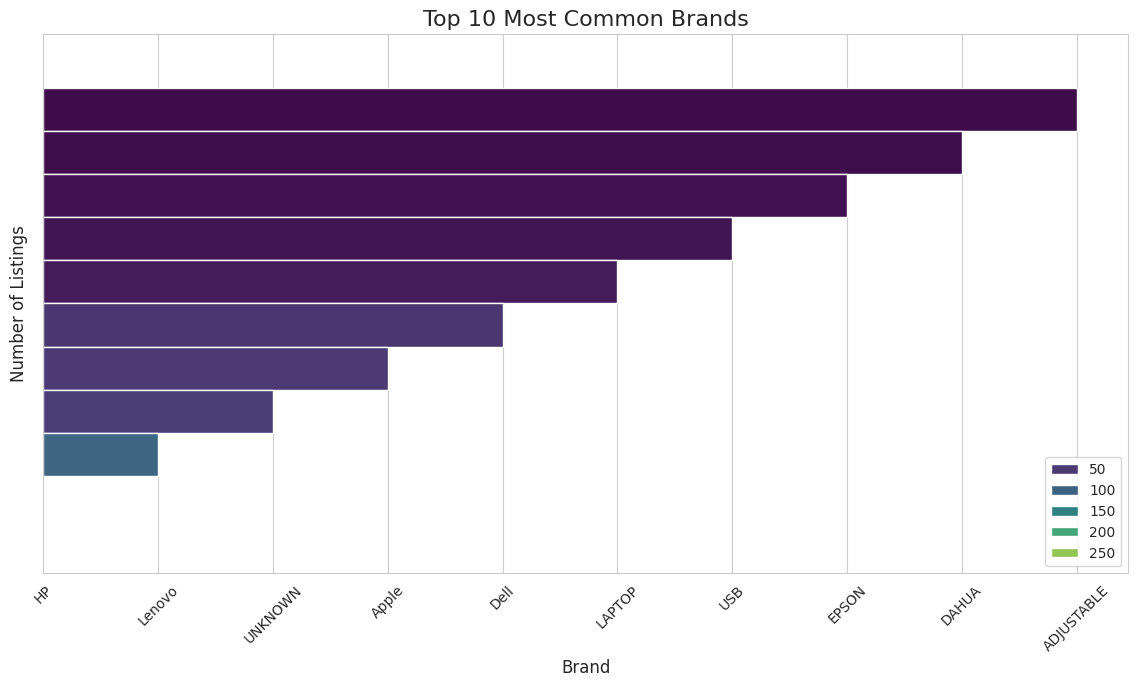

In [43]:
brand_counts = df['brand'].value_counts().nlargest(10)
plt.figure(figsize=(14, 7))
sns.barplot(x=brand_counts.index, hue=brand_counts.values, palette='viridis')
plt.title('Top 10 Most Common Brands', fontsize=16)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Number of Listings', fontsize=12)
plt.xticks(rotation=45)
plt.show();

**HP** and **Lenovo** dominate the listings, followed by **Dell** and **Apple**. This is expected as they are major players in the laptop market.

### 6. Most Affordable Laptops
Let's find the 10 cheapest laptops available.

In [44]:
cheapest_laptops = df.sort_values(by='price', ascending=True).head(10)
cheapest_laptops[['product_name', 'brand', 'price', 'rating_score']]

,product_name,brand,price,rating_score
306,JC 2.4GHz MICE Wireless Mouse Gaming Mouse USB...,JC,159,4.5
77,Mouse Mat PC Wrist Rest Support,MOUSE,189,3.8
463,"10pcs RJ45 CAT5 ,CAT6 Ethernet Network Connector",10PCS,199,5.0
395,Computer Desktop CPU And Monitor Power Cable,COMPUTER,240,4.5
576,Laptop Power Cable 2Pin Fused Power Cable,LAPTOP,240,0.0
394,Laptop Charger Flower Power Cable 3 PIN,LAPTOP,249,4.4
210,Laptop Charger Flower Power Cable,LAPTOP,250,4.6
120,4 Ports USB HUB Docking Station With Independe...,4,260,4.0
142,Adjustable Laptop Bracket - White,ADJUSTABLE,269,2.3
61,White Label Foldable Laptop Tablet Stand Adjus...,WHITE,269,3.2


### 7. Highest Rated Laptops
To find the best-rated laptops, we should consider both the rating score and the number of ratings to avoid products with a single 5-star review. We'll filter for laptops with at least 5 reviews.

In [45]:
well_rated_laptops = df[df['rating_count'] >= 5]
highest_rated = well_rated_laptops.sort_values(by=['rating_score', 'rating_count'], ascending=[False, False]).head(10)
highest_rated[['product_name', 'brand', 'price', 'rating_score', 'rating_count']]

,product_name,brand,price,rating_score,rating_count
190,Aluminum Alloy Laptop Stand,ALUMINUM,3316,5.0,16
445,"HP Probook 6470b, 6570b, 640 G1, 430 G1, 430 G...",HP,938,5.0,7
585,"Logitech H390 Wired Headset for PC/Laptop, Ste...",LOGITECH,4940,5.0,6
223,4 In 1 Type C Multi-screen Display Docking Sta...,4,336,5.0,5
554,Handboss 3 in 1 TV and Laptop Monitor Computer...,HANDBOSS,1201,5.0,5
679,Lenovo Laptop Thinkpad X270 X250 X260 Charger ...,Lenovo,1139,5.0,5
783,Epson EcoTank L3250 Wireless All-in-One Ink Ta...,EPSON,22950,5.0,5
393,2in1 1300Mbps WiFi + Bluetooth 5.0 Powerful Ad...,2IN1,2633,4.9,16
198,LASA Adjustable Laptop Desk – Folding Table Fo...,LASA,3082,4.9,10
329,CS03XL Battery for HP Elitebook 745 755 840 84...,HP,3199,4.9,8


### 8. Relationship between Price and Rating
Does a higher price mean a better rating? Let's create a scatter plot to investigate. We'll only use products with a reasonable number of reviews for a more meaningful plot.

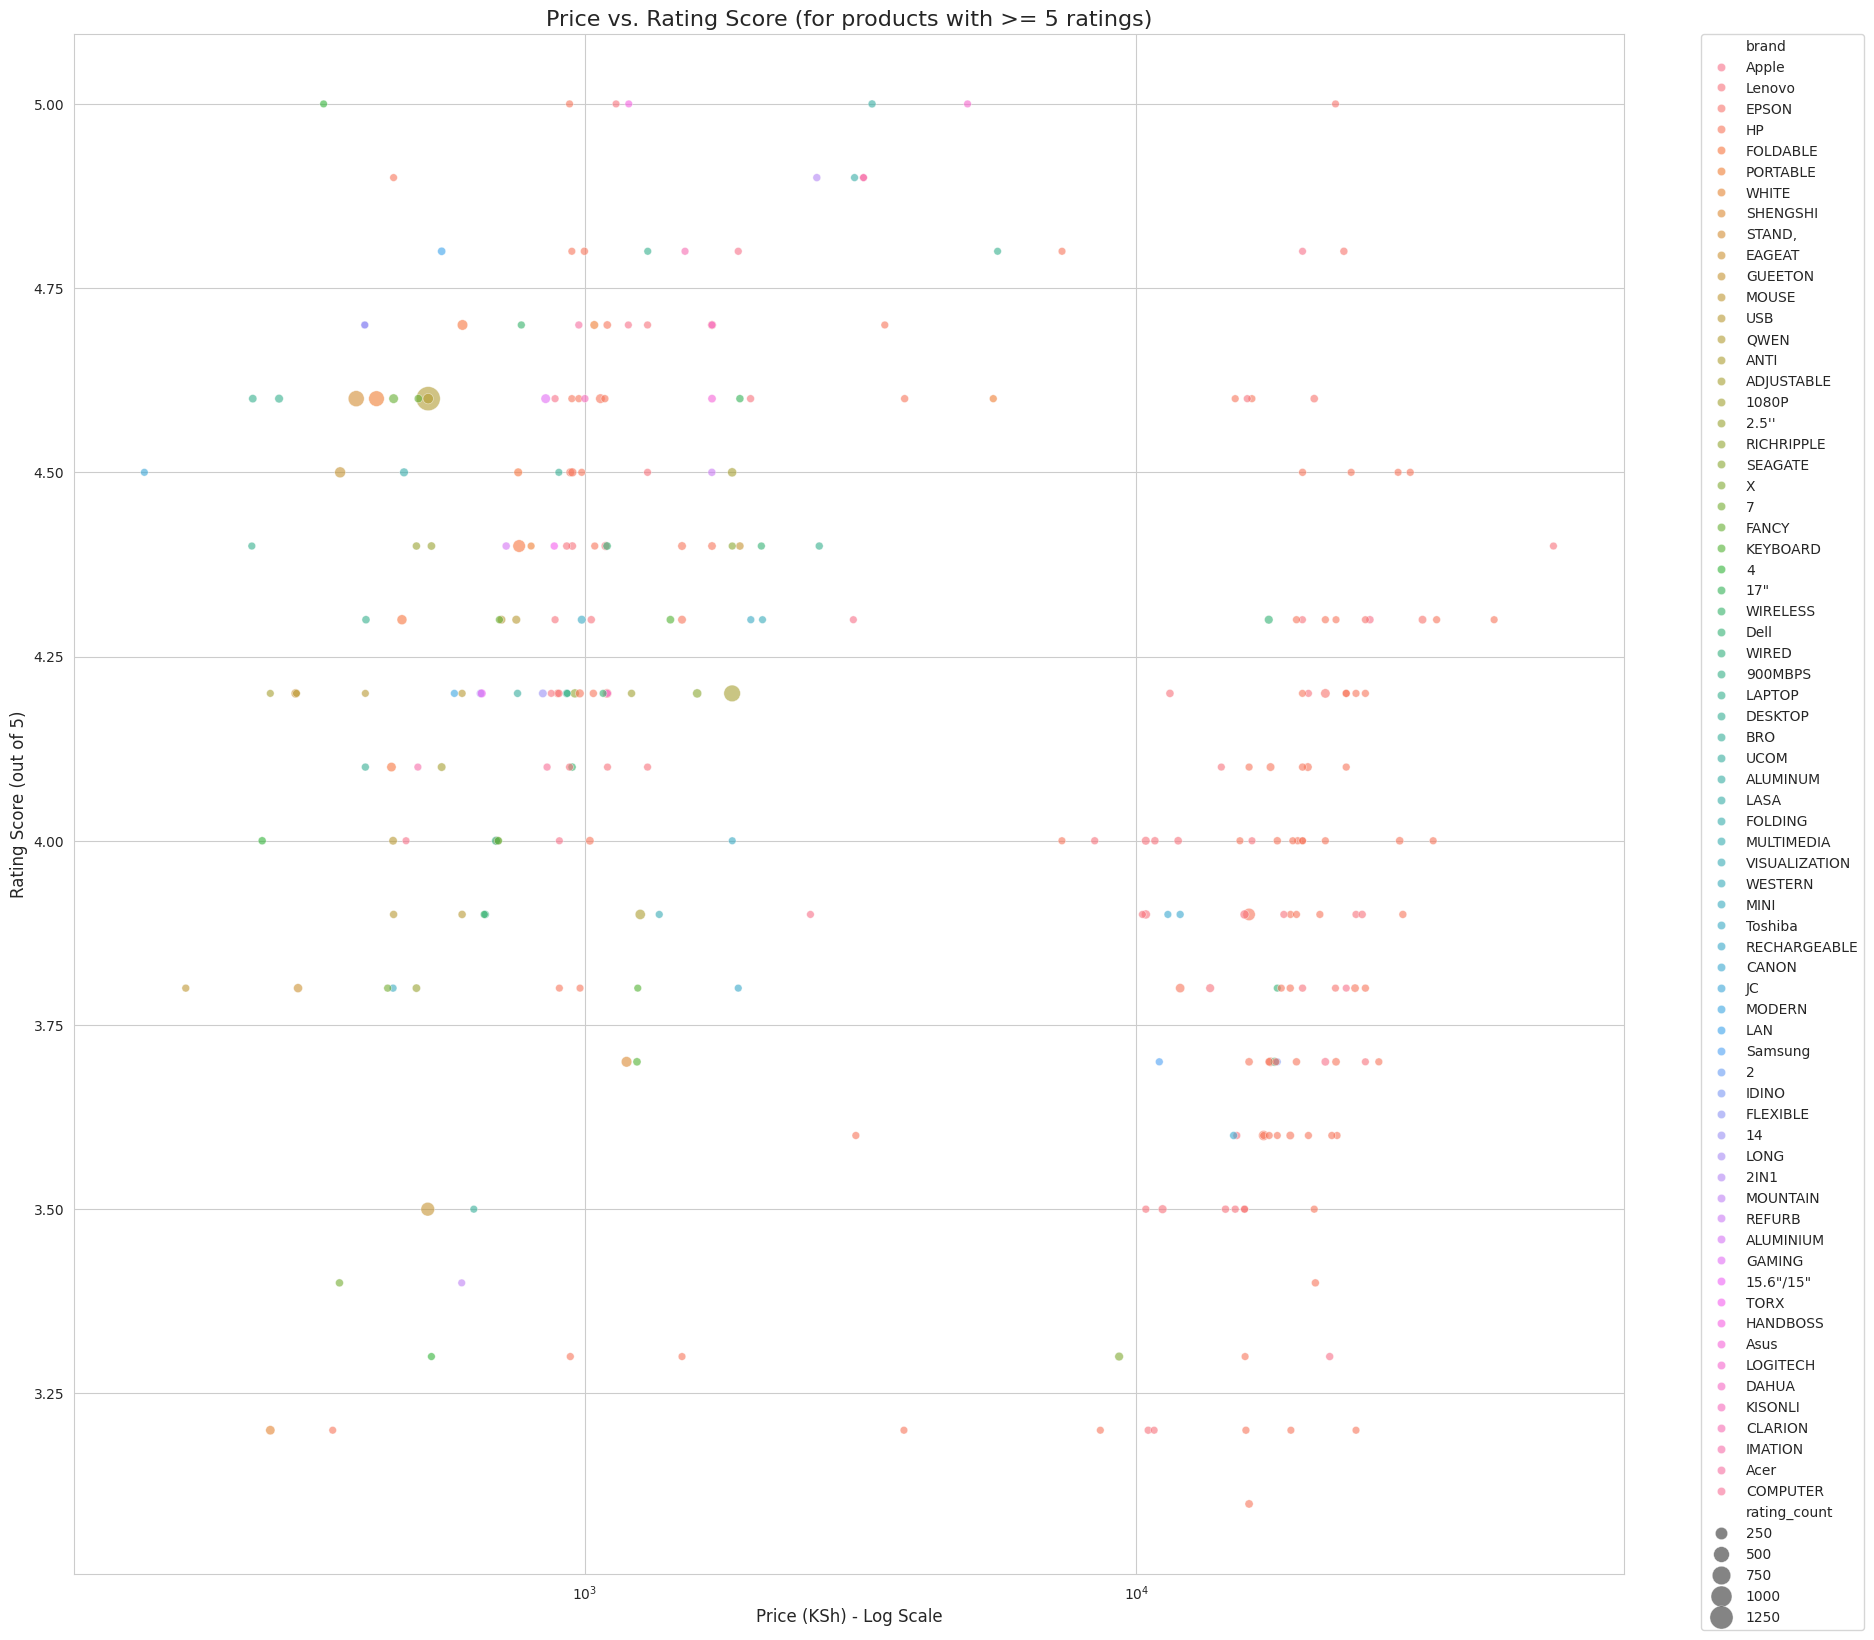

In [66]:
plt.figure(figsize=(20, 20))

sns.scatterplot(
    data=well_rated_laptops,
    x='price',
    y='rating_score',
    alpha=0.6,
    hue='brand',
    size='rating_count',
    sizes=(30, 300)
)

plt.title('Price vs. Rating Score (for products with >= 5 ratings)', fontsize=16)
plt.xlabel('Price (KSh) - Log Scale', fontsize=12)
plt.ylabel('Rating Score (out of 5)', fontsize=12)
plt.xscale('log')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show();

**Conclusion:** The scatter plot doesn't show a strong, clear correlation between price and rating. There are highly-rated laptops across various price points. This suggests that customers can find good value without necessarily buying the most expensive products. Apple products, while expensive, tend to have consistently high ratings.